In [7]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json 

#Import API Key
from api_key import fbi_cde_key

In [4]:
# Load the Data from Kento's API pull
file_path = "./Resources/state_id.csv"
state_id_df = pd.read_csv(file_path)
pd.DataFrame(state_id_df)
state_id_df.loc[:, ["State_ID"]].head()

,State_ID
0,AL
1,AK
2,AS
3,AZ
4,AR


In [5]:
state_id_list = state_id_df["State_ID"].tolist()
print(state_id_list)

['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FM', 'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MH', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'MP', 'OH', 'OK', 'OR', 'PW', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV', 'WI', 'WY']


In [6]:
for state_id in state_id_list:
    url = f"https://api.usa.gov/crime/fbi/cde/arrest/state/{state_id}/property_crime?from=2017&to=2021&API_KEY={fbi_cde_key}"
    print(url)

https://api.usa.gov/crime/fbi/cde/arrest/state/AL/property_crime?from=2017&to=2021&API_KEY=KX3EgNxVLiRyc2XiwtYS7BF6GUsBtmf25aszpVsn
https://api.usa.gov/crime/fbi/cde/arrest/state/AK/property_crime?from=2017&to=2021&API_KEY=KX3EgNxVLiRyc2XiwtYS7BF6GUsBtmf25aszpVsn
https://api.usa.gov/crime/fbi/cde/arrest/state/AS/property_crime?from=2017&to=2021&API_KEY=KX3EgNxVLiRyc2XiwtYS7BF6GUsBtmf25aszpVsn
https://api.usa.gov/crime/fbi/cde/arrest/state/AZ/property_crime?from=2017&to=2021&API_KEY=KX3EgNxVLiRyc2XiwtYS7BF6GUsBtmf25aszpVsn
https://api.usa.gov/crime/fbi/cde/arrest/state/AR/property_crime?from=2017&to=2021&API_KEY=KX3EgNxVLiRyc2XiwtYS7BF6GUsBtmf25aszpVsn
https://api.usa.gov/crime/fbi/cde/arrest/state/CA/property_crime?from=2017&to=2021&API_KEY=KX3EgNxVLiRyc2XiwtYS7BF6GUsBtmf25aszpVsn
https://api.usa.gov/crime/fbi/cde/arrest/state/CO/property_crime?from=2017&to=2021&API_KEY=KX3EgNxVLiRyc2XiwtYS7BF6GUsBtmf25aszpVsn
https://api.usa.gov/crime/fbi/cde/arrest/state/CT/property_crime?from=2017&t

In [7]:
data_list = []

for state_id in state_id_list:
    url = f"https://api.usa.gov/crime/fbi/cde/arrest/state/{state_id}/property_crime?from=2017&to=2021&API_KEY={fbi_cde_key}"
    response = requests.get(url).json()

    data = response["data"]
    for data_list_response in data:
        data_list_response ["state"] = state_id
        data_list.append(data_list_response)

In [8]:
data_list

[{'data_year': 2017,
  'Motor Vehicle Theft': 877,
  'Arson': 104,
  'Burglary': 2880,
  'Embezzlement': 152,
  'Forgery and Counterfeiting': 1109,
  'Fraud': 2819,
  'Larceny - Theft': 13959,
  'Vandalism': 1256,
  'Stolen Property: Buying, Receiving, Possessing': 2280,
  'state': 'AL'},
 {'data_year': 2018,
  'Motor Vehicle Theft': 994,
  'Arson': 110,
  'Burglary': 2809,
  'Embezzlement': 150,
  'Forgery and Counterfeiting': 983,
  'Fraud': 2611,
  'Larceny - Theft': 14513,
  'Vandalism': 1234,
  'Stolen Property: Buying, Receiving, Possessing': 2177,
  'state': 'AL'},
 {'data_year': 2019,
  'Motor Vehicle Theft': 920,
  'Arson': 88,
  'Burglary': 2198,
  'Embezzlement': 140,
  'Forgery and Counterfeiting': 846,
  'Fraud': 2309,
  'Larceny - Theft': 13555,
  'Vandalism': 1183,
  'Stolen Property: Buying, Receiving, Possessing': 1881,
  'state': 'AL'},
 {'data_year': 2020,
  'Motor Vehicle Theft': 20,
  'Arson': 3,
  'Burglary': 65,
  'Embezzlement': 7,
  'Forgery and Counterfeiting'

In [9]:
json_data = json.dumps(data_list, indent=4)

file_path = "FBI_Data_Raw.json"

with open(file_path,'w') as json_file:
    json_file.write(json_data)

print(f"API response saved to {file_path}")

API response saved to FBI_Data_Raw.json


In [10]:
# To avoid polling the API again, we can pull the data from the saved JSON.
pull_json = "FBI_Data_Raw.json"

json_response_df = pd.read_json(pull_json)
json_response_df

,data_year,Motor Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Larceny - Theft,Vandalism,"Stolen Property: Buying, Receiving, Possessing",state
0,2017,877,104,2880,152,1109,2819,13959,1256,2280,AL
1,2018,994,110,2809,150,983,2611,14513,1234,2177,AL
2,2019,920,88,2198,140,846,2309,13555,1183,1881,AL
3,2020,20,3,65,7,34,56,435,29,46,AL
4,2021,320,24,696,4,195,431,2561,627,622,AL
...,...,...,...,...,...,...,...,...,...,...,...
251,2017,130,38,217,18,49,158,1995,493,94,WY
252,2018,128,19,243,6,36,127,1818,419,80,WY
253,2019,104,27,229,1,29,112,1562,467,55,WY
254,2020,149,18,211,2,19,97,1640,502,50,WY


In [11]:
# Clean the Dataframe
crime_df = json_response_df.rename(columns=
                              {"data_year": "Year",
                               "Motor Vehicle Theft": "Vehicle Theft",
                               "state": "State",
                               "Stolen Property: Buying, Receiving, Possessing": "Dealing in Stolen Property"
                              })
crime_df


,Year,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Larceny - Theft,Vandalism,Dealing in Stolen Property,State
0,2017,877,104,2880,152,1109,2819,13959,1256,2280,AL
1,2018,994,110,2809,150,983,2611,14513,1234,2177,AL
2,2019,920,88,2198,140,846,2309,13555,1183,1881,AL
3,2020,20,3,65,7,34,56,435,29,46,AL
4,2021,320,24,696,4,195,431,2561,627,622,AL
...,...,...,...,...,...,...,...,...,...,...,...
251,2017,130,38,217,18,49,158,1995,493,94,WY
252,2018,128,19,243,6,36,127,1818,419,80,WY
253,2019,104,27,229,1,29,112,1562,467,55,WY
254,2020,149,18,211,2,19,97,1640,502,50,WY


In [12]:
crime_df_cleaned = crime_df[["Year", 
                        "State", 
                        "Larceny - Theft",
                        "Vehicle Theft", 
                        "Arson", 
                        "Burglary", 
                        "Embezzlement", 
                        "Forgery and Counterfeiting", 
                        "Fraud", 
                        "Vandalism",
                        "Dealing in Stolen Property"
                       ]]
crime_df_cleaned

,Year,State,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property
0,2017,AL,13959,877,104,2880,152,1109,2819,1256,2280
1,2018,AL,14513,994,110,2809,150,983,2611,1234,2177
2,2019,AL,13555,920,88,2198,140,846,2309,1183,1881
3,2020,AL,435,20,3,65,7,34,56,29,46
4,2021,AL,2561,320,24,696,4,195,431,627,622
...,...,...,...,...,...,...,...,...,...,...,...
251,2017,WY,1995,130,38,217,18,49,158,493,94
252,2018,WY,1818,128,19,243,6,36,127,419,80
253,2019,WY,1562,104,27,229,1,29,112,467,55
254,2020,WY,1640,149,18,211,2,19,97,502,50


In [13]:
census_path = "./Resources/census_data.csv"

census_df = pd.read_csv(census_path)
census_df.head()

,State,epop2017,epop2018,epop2019,epop2020
0,AL,4877989,4891628,4907965,4921532
1,AK,740983,736624,733603,731158
2,AZ,7048088,7164228,7291843,7421401
3,AR,3003855,3012161,3020985,3030522
4,CA,39337785,39437463,39437610,39368078


In [14]:
# Combine the Crime and Census Dataframes
crime_census_combined = crime_df_cleaned.merge(census_df,how="left", on=["State", "State"])
crime_census_combined

,Year,State,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property,epop2017,epop2018,epop2019,epop2020
0,2017,AL,13959,877,104,2880,152,1109,2819,1256,2280,4877989.0,4891628.0,4907965.0,4921532.0
1,2018,AL,14513,994,110,2809,150,983,2611,1234,2177,4877989.0,4891628.0,4907965.0,4921532.0
2,2019,AL,13555,920,88,2198,140,846,2309,1183,1881,4877989.0,4891628.0,4907965.0,4921532.0
3,2020,AL,435,20,3,65,7,34,56,29,46,4877989.0,4891628.0,4907965.0,4921532.0
4,2021,AL,2561,320,24,696,4,195,431,627,622,4877989.0,4891628.0,4907965.0,4921532.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2017,WY,1995,130,38,217,18,49,158,493,94,579994.0,579054.0,580116.0,582328.0
252,2018,WY,1818,128,19,243,6,36,127,419,80,579994.0,579054.0,580116.0,582328.0
253,2019,WY,1562,104,27,229,1,29,112,467,55,579994.0,579054.0,580116.0,582328.0
254,2020,WY,1640,149,18,211,2,19,97,502,50,579994.0,579054.0,580116.0,582328.0


In [15]:
# Add the crime columns together in each row to crete a "Total Arrests" column
crime_census_combined["Total Arrests"] = crime_census_combined["Larceny - Theft"] + crime_census_combined["Vehicle Theft"] + crime_census_combined["Arson"] + crime_census_combined["Burglary"] + crime_census_combined["Embezzlement"] + crime_census_combined["Forgery and Counterfeiting"] + crime_census_combined["Fraud"] + crime_census_combined["Vandalism"] + crime_census_combined["Dealing in Stolen Property"]
crime_census_combined

,Year,State,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property,epop2017,epop2018,epop2019,epop2020,Total Arrests
0,2017,AL,13959,877,104,2880,152,1109,2819,1256,2280,4877989.0,4891628.0,4907965.0,4921532.0,25436
1,2018,AL,14513,994,110,2809,150,983,2611,1234,2177,4877989.0,4891628.0,4907965.0,4921532.0,25581
2,2019,AL,13555,920,88,2198,140,846,2309,1183,1881,4877989.0,4891628.0,4907965.0,4921532.0,23120
3,2020,AL,435,20,3,65,7,34,56,29,46,4877989.0,4891628.0,4907965.0,4921532.0,695
4,2021,AL,2561,320,24,696,4,195,431,627,622,4877989.0,4891628.0,4907965.0,4921532.0,5480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2017,WY,1995,130,38,217,18,49,158,493,94,579994.0,579054.0,580116.0,582328.0,3192
252,2018,WY,1818,128,19,243,6,36,127,419,80,579994.0,579054.0,580116.0,582328.0,2876
253,2019,WY,1562,104,27,229,1,29,112,467,55,579994.0,579054.0,580116.0,582328.0,2586
254,2020,WY,1640,149,18,211,2,19,97,502,50,579994.0,579054.0,580116.0,582328.0,2688


In [16]:
# Put Total Arrests near the front of the dataframe
combined_cleaned = crime_census_combined[["Year", 
                        "State", 
                        "Total Arrests",
                        "Larceny - Theft",
                        "Vehicle Theft", 
                        "Arson", 
                        "Burglary", 
                        "Embezzlement", 
                        "Forgery and Counterfeiting", 
                        "Fraud", 
                        "Vandalism",
                        "Dealing in Stolen Property",
                        "epop2017",
                        "epop2018",
                        "epop2019",
                        "epop2020"
                       ]]
combined_cleaned

,Year,State,Total Arrests,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property,epop2017,epop2018,epop2019,epop2020
0,2017,AL,25436,13959,877,104,2880,152,1109,2819,1256,2280,4877989.0,4891628.0,4907965.0,4921532.0
1,2018,AL,25581,14513,994,110,2809,150,983,2611,1234,2177,4877989.0,4891628.0,4907965.0,4921532.0
2,2019,AL,23120,13555,920,88,2198,140,846,2309,1183,1881,4877989.0,4891628.0,4907965.0,4921532.0
3,2020,AL,695,435,20,3,65,7,34,56,29,46,4877989.0,4891628.0,4907965.0,4921532.0
4,2021,AL,5480,2561,320,24,696,4,195,431,627,622,4877989.0,4891628.0,4907965.0,4921532.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2017,WY,3192,1995,130,38,217,18,49,158,493,94,579994.0,579054.0,580116.0,582328.0
252,2018,WY,2876,1818,128,19,243,6,36,127,419,80,579994.0,579054.0,580116.0,582328.0
253,2019,WY,2586,1562,104,27,229,1,29,112,467,55,579994.0,579054.0,580116.0,582328.0
254,2020,WY,2688,1640,149,18,211,2,19,97,502,50,579994.0,579054.0,580116.0,582328.0


In [3]:
# For Laura: Normalize Create a new column with a calculated per-capita crime rate.

normalized_data = pd.read_csv('./Resources/fbi-crime-data-normalized.csv')
print(normalized_data)

     State  Year                                           Crime  Arrests
0       AL  2017                             Motor Vehicle Theft      877
1       AL  2018                             Motor Vehicle Theft      994
2       AL  2019                             Motor Vehicle Theft      920
3       AL  2020                             Motor Vehicle Theft       20
4       AL  2021                             Motor Vehicle Theft      320
...    ...   ...                                             ...      ...
2299    WY  2017  Stolen Property: Buying, Receiving, Possessing       94
2300    WY  2018  Stolen Property: Buying, Receiving, Possessing       80
2301    WY  2019  Stolen Property: Buying, Receiving, Possessing       55
2302    WY  2020  Stolen Property: Buying, Receiving, Possessing       50
2303    WY  2021  Stolen Property: Buying, Receiving, Possessing       10

[2304 rows x 4 columns]


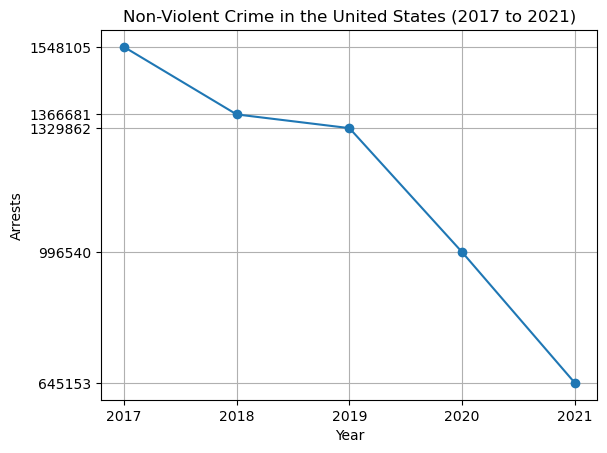

In [50]:
# Use the National Data to show the crime rate over time
# For Michelle:  We will need to redo this when we get the per-capita data from Laura

national_total = normalized_data.groupby("Year")["Arrests"].sum().reset_index()

plt.plot(national_total["Year"], national_total["Arrests"], marker="o")

plt.title("Non-Violent Crime in the United States (2017 to 2021)")
plt.xlabel("Year")
plt.ylabel("Arrests")

plt.yticks(national_total["Arrests"])
plt.xticks(national_total["Year"])
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.show()


In [51]:
# Isolate Crime Data by year for later graphs.
# 2017
crime_df_2017 = normalized_data[normalized_data["Year"] == 2017]
crime_df_2017.head()

,State,Year,Crime,Arrests
0,AL,2017,Motor Vehicle Theft,877
5,AK,2017,Motor Vehicle Theft,694
10,AZ,2017,Motor Vehicle Theft,1735
15,AR,2017,Motor Vehicle Theft,623
20,CA,2017,Motor Vehicle Theft,19541


In [52]:
# 2018
crime_df_2018 = normalized_data[normalized_data["Year"] == 2018]
crime_df_2018.head()

,State,Year,Crime,Arrests
1,AL,2018,Motor Vehicle Theft,994
6,AK,2018,Motor Vehicle Theft,726
11,AZ,2018,Motor Vehicle Theft,1794
16,AR,2018,Motor Vehicle Theft,652
21,CA,2018,Motor Vehicle Theft,18020


In [53]:
# 2019
crime_df_2019 = normalized_data[normalized_data["Year"] == 2019]
crime_df_2019.head()

,State,Year,Crime,Arrests
2,AL,2019,Motor Vehicle Theft,920
7,AK,2019,Motor Vehicle Theft,476
12,AZ,2019,Motor Vehicle Theft,1570
17,AR,2019,Motor Vehicle Theft,619
22,CA,2019,Motor Vehicle Theft,15240


In [54]:
# 2020
crime_df_2020 = normalized_data[normalized_data["Year"] == 2020]
crime_df_2020.head()

,State,Year,Crime,Arrests
3,AL,2020,Motor Vehicle Theft,20
8,AK,2020,Motor Vehicle Theft,338
13,AZ,2020,Motor Vehicle Theft,1684
18,AR,2020,Motor Vehicle Theft,553
23,CA,2020,Motor Vehicle Theft,16369


In [61]:
# 2021
crime_df_2021 = normalized_data[normalized_data["Year"] == 2021]
crime_df_2021.head()

,State,Year,Crime,Arrests
4,AL,2021,Motor Vehicle Theft,320
9,AK,2021,Motor Vehicle Theft,96
14,AZ,2021,Motor Vehicle Theft,697
19,AR,2021,Motor Vehicle Theft,659
24,CA,2021,Motor Vehicle Theft,823


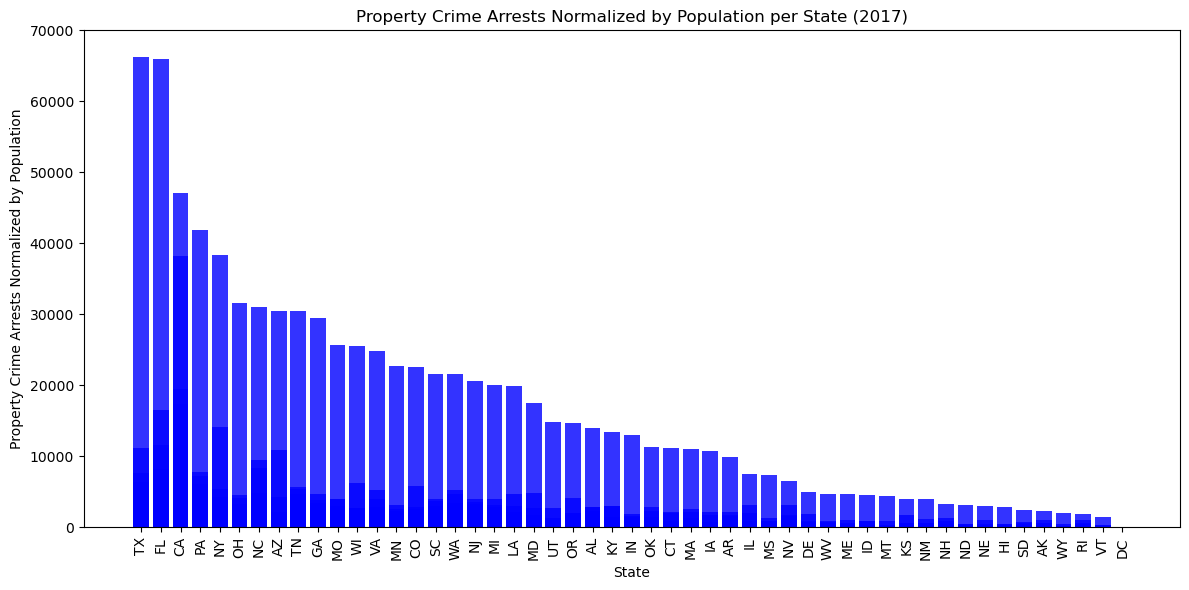

In [84]:
# Create Descending Order 2017 Property Crime Bar Chart

crime_df_2017_sorted = crime_df_2017.sort_values(by="Arrests", ascending=False)

x_values = crime_df_2017_sorted["State"]
y_values = crime_df_2017_sorted["Arrests"]

plt.figure(figsize=(12, 6))
plt.bar(x_values, y_values, color="blue", alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Property Crime Arrests Normalized by Population")
plt.title("Property Crime Arrests Normalized by Population per State (2017)")
plt.ylim(0, 70000)
plt.tight_layout()
plt.show()

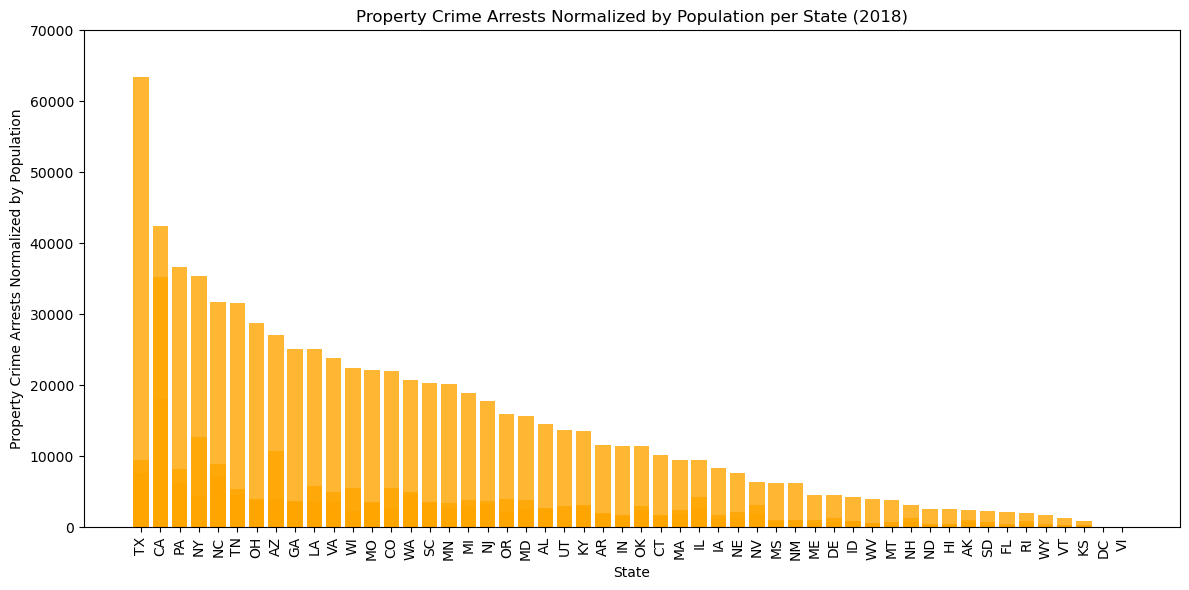

In [85]:
# Create Descending Order 2018 Property Crime Bar Chart

crime_df_2018_sorted = crime_df_2018.sort_values(by="Arrests", ascending=False)

x_values = crime_df_2018_sorted["State"]
y_values = crime_df_2018_sorted["Arrests"]

plt.figure(figsize=(12, 6))
plt.bar(x_values, y_values, color="orange", alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Property Crime Arrests Normalized by Population")
plt.ylim(0, 70000)
plt.title("Property Crime Arrests Normalized by Population per State (2018)")
plt.tight_layout()
plt.show()

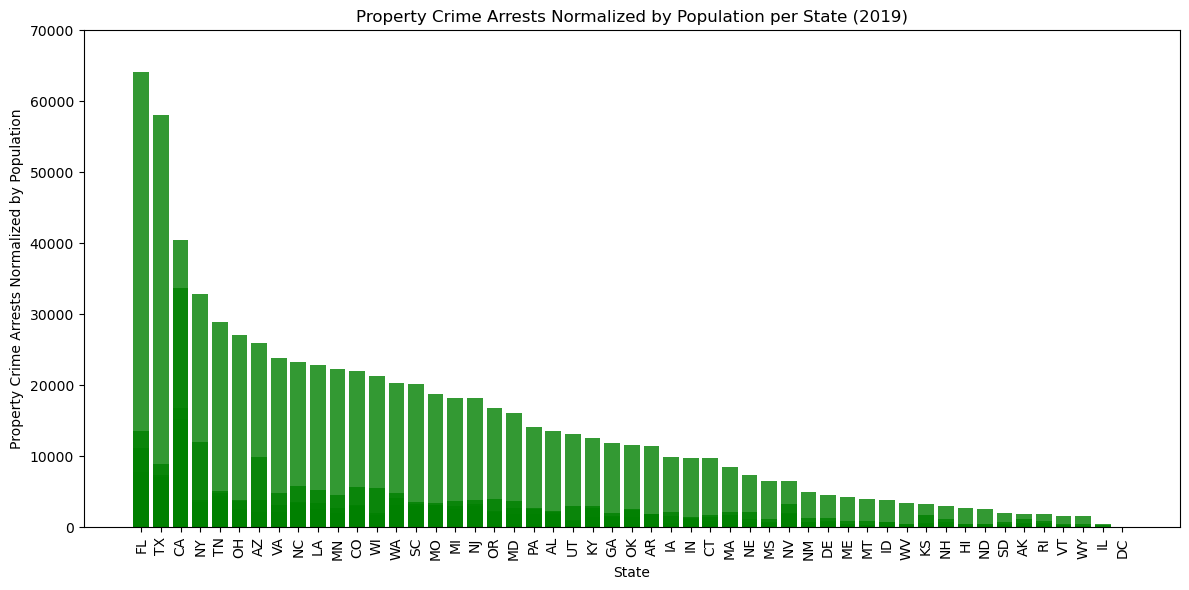

In [86]:
# Create Descending Order 2019 Property Crime Bar Chart

crime_df_2019_sorted = crime_df_2019.sort_values(by="Arrests", ascending=False)

x_values = crime_df_2019_sorted["State"]
y_values = crime_df_2019_sorted["Arrests"]

plt.figure(figsize=(12, 6))
plt.bar(x_values, y_values, color="green", alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Property Crime Arrests Normalized by Population")
plt.ylim(0, 70000)
plt.title("Property Crime Arrests Normalized by Population per State (2019)")
plt.tight_layout()
plt.show()

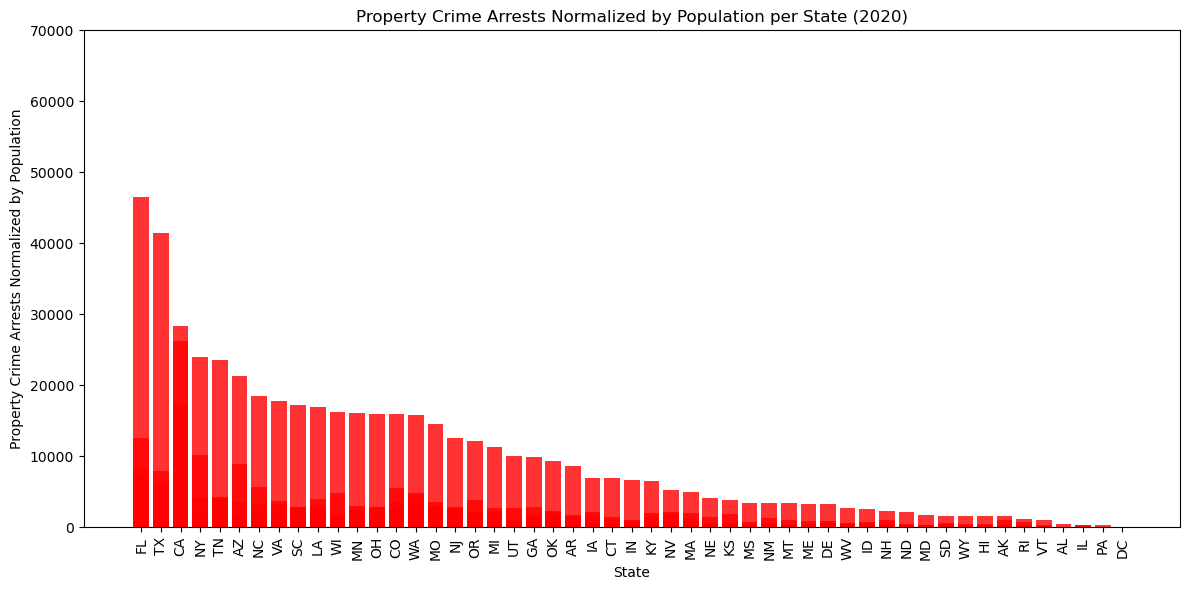

In [87]:
# Create Descending Order 2020 Property Crime Bar Chart

crime_df_2020_sorted = crime_df_2020.sort_values(by="Arrests", ascending=False)

x_values = crime_df_2020_sorted["State"]
y_values = crime_df_2020_sorted["Arrests"]

plt.figure(figsize=(12, 6))
plt.bar(x_values, y_values, color="red", alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Property Crime Arrests Normalized by Population")
plt.ylim(0, 70000)
plt.title("Property Crime Arrests Normalized by Population per State (2020)")
plt.tight_layout()
plt.show()

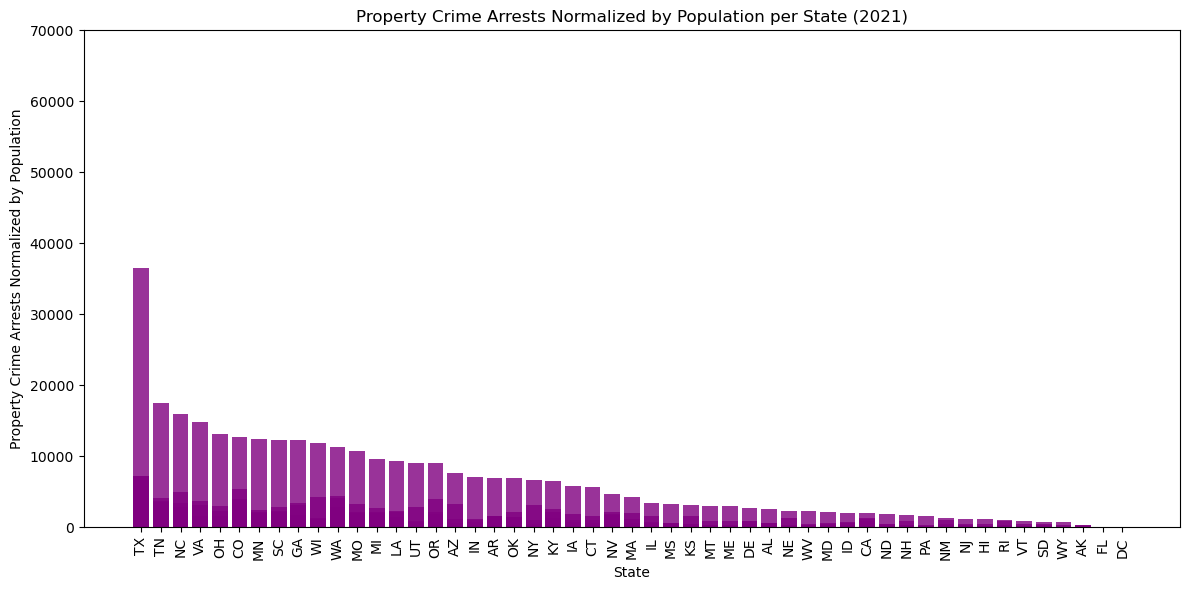

In [88]:
# Create Descending Order 2021 Property Crime Bar Chart

crime_df_2021_sorted = crime_df_2021.sort_values(by="Arrests", ascending=False)

x_values = crime_df_2021_sorted["State"]
y_values = crime_df_2021_sorted["Arrests"]

plt.figure(figsize=(12, 6))
plt.bar(x_values, y_values, color="purple", alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Property Crime Arrests Normalized by Population")
plt.ylim(0, 70000)
plt.title("Property Crime Arrests Normalized by Population per State (2021)")
plt.tight_layout()
plt.show()

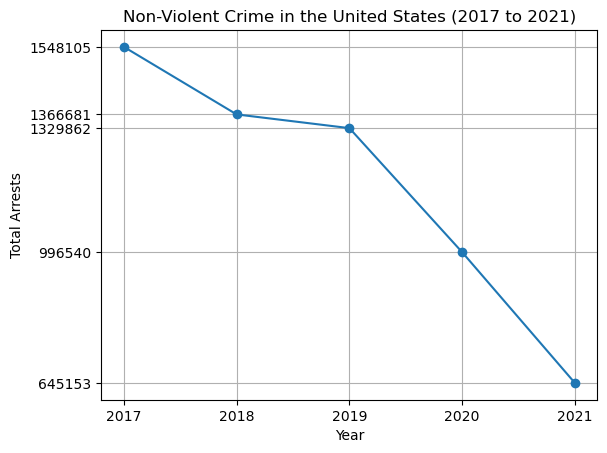

In [63]:
# Create Chronological Line Graph of National Property Crime

national_total = normalized_data.groupby("Year")["Arrests"].sum().reset_index()

plt.plot(national_total["Year"], national_total["Arrests"], marker="o")

plt.title("Non-Violent Crime in the United States (2017 to 2021)")
plt.xlabel("Year")
plt.ylabel("Total Arrests")

plt.yticks(national_total["Arrests"])
plt.xticks(national_total["Year"])
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.show()


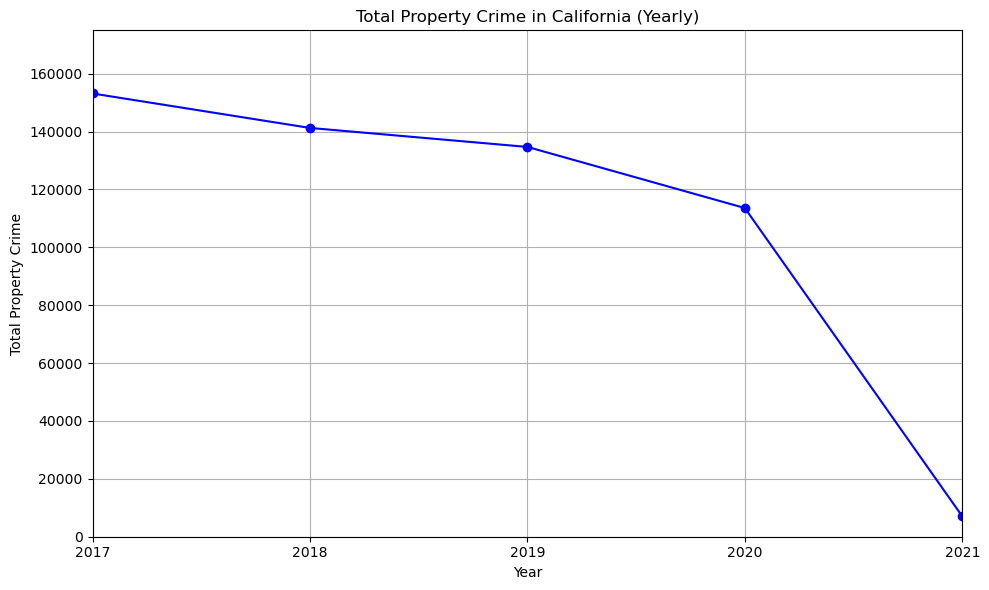

In [65]:
california_data = normalized_data[normalized_data["State"] == "CA"] 

# Group the data by year and calculate the sum of total property crime
california_yearly_totals = california_data.groupby("Year")["Arrests"].sum().reset_index()

# Extract the year and total property crime values
years = california_yearly_totals["Year"]
crime_totals = california_yearly_totals["Arrests"]

# Create a line graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(years, crime_totals, marker='o', linestyle='-', color='b')  # 'o' for markers, '-' for lines, 'b' for blue color
plt.xlabel("Year")
plt.ylabel("Total Property Crime")
plt.title("Total Property Crime in California (Yearly)")

# Add grid lines
plt.grid(True)  

# Set the y-axis boundaries (minimum and maximum values)
plt.ylim(0, 175000)

# Set x-axis boundaries (minimum and maximum values)
plt.xlim(2017, 2021)

# Set x-axis ticks to increment by 1
plt.xticks(range(2017, 2022, 1))

# Adjust  layout
plt.tight_layout()  
plt.show()

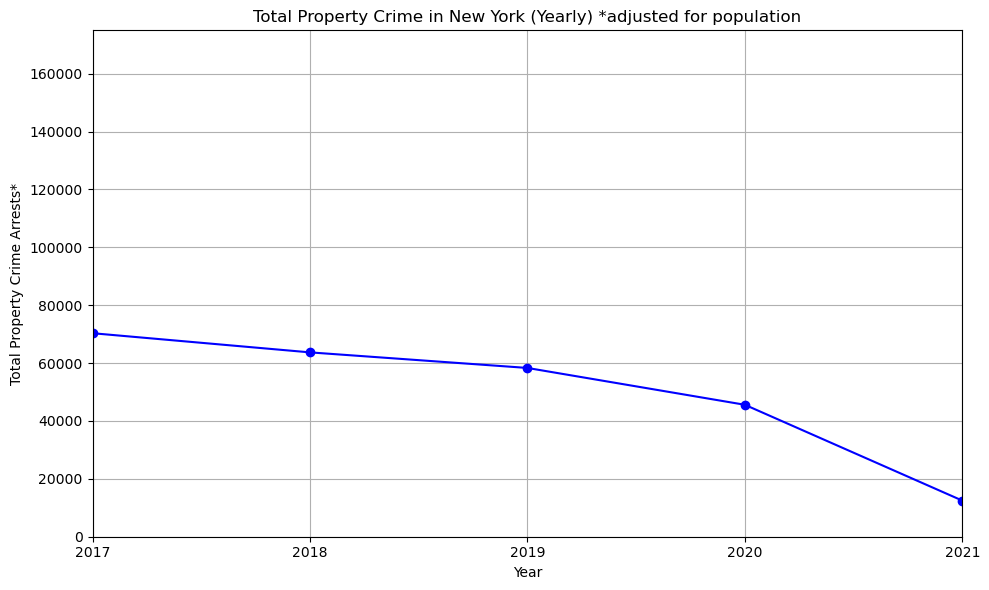

In [66]:
new_york_data = combined_cleaned[combined_cleaned["State"] == "NY"]

# Group the data by year and calculate the sum of total property crime
new_york_yearly_totals = new_york_data.groupby("Year")["Total Arrests"].sum().reset_index()

# Extract the year and total property crime values
years = new_york_yearly_totals["Year"]
crime_totals = new_york_yearly_totals["Total Arrests"]

# Create a line graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(years, crime_totals, marker='o', linestyle='-', color='b')  # 'o' for markers, '-' for lines, 'b' for blue color
plt.xlabel("Year")
plt.ylabel("Total Property Crime Arrests*")
plt.title("Total Property Crime in New York (Yearly) *adjusted for population")

# Add grid lines if needed
plt.grid(True)  

# Set the y-axis boundaries (minimum and maximum values)
plt.ylim(0, 175000)

# Set the x-axis boundaries (minimum and maximum values)
plt.xlim(2017, 2021)

# Set the x-axis ticks to increment by 1
plt.xticks(range(2017, 2022, 1))

# Adjust the layout
plt.tight_layout()  
plt.show()

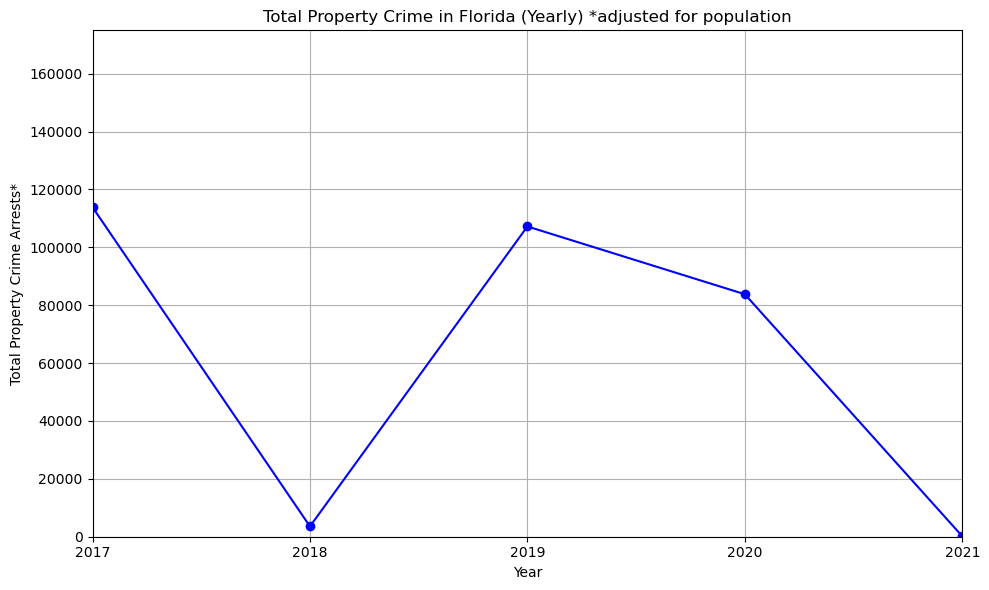

In [67]:
florida_data = normalized_data[normalized_data["State"] == "FL"]

# Group the data by year and calculate the sum of total property crime
florida_yearly_totals = florida_data.groupby("Year")["Arrests"].sum().reset_index()

# Extract the year and total property crime values
years = florida_yearly_totals["Year"]
crime_totals = florida_yearly_totals["Arrests"]

# Create a line graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(years, crime_totals, marker='o', linestyle='-', color='b')  # 'o' for markers, '-' for lines, 'b' for blue color
plt.xlabel("Year")
plt.ylabel("Total Property Crime Arrests*")
plt.title("Total Property Crime in Florida (Yearly) *adjusted for population")

# Add grid lines if needed
plt.grid(True)  

# Set the y-axis boundaries (minimum and maximum values)
plt.ylim(0, 175000)

# Set the x-axis boundaries (minimum and maximum values)
plt.xlim(2017, 2021)

# Set the x-axis ticks to increment by 1
plt.xticks(range(2017, 2022, 1))

# Adjust the layout
plt.tight_layout()  
plt.show()

In [33]:
combined_cleaned

,Year,State,Total Arrests,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property,epop2017,epop2018,epop2019,epop2020
0,2017,AL,25436,13959,877,104,2880,152,1109,2819,1256,2280,4877989.0,4891628.0,4907965.0,4921532.0
1,2018,AL,25581,14513,994,110,2809,150,983,2611,1234,2177,4877989.0,4891628.0,4907965.0,4921532.0
2,2019,AL,23120,13555,920,88,2198,140,846,2309,1183,1881,4877989.0,4891628.0,4907965.0,4921532.0
3,2020,AL,695,435,20,3,65,7,34,56,29,46,4877989.0,4891628.0,4907965.0,4921532.0
4,2021,AL,5480,2561,320,24,696,4,195,431,627,622,4877989.0,4891628.0,4907965.0,4921532.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2017,WY,3192,1995,130,38,217,18,49,158,493,94,579994.0,579054.0,580116.0,582328.0
252,2018,WY,2876,1818,128,19,243,6,36,127,419,80,579994.0,579054.0,580116.0,582328.0
253,2019,WY,2586,1562,104,27,229,1,29,112,467,55,579994.0,579054.0,580116.0,582328.0
254,2020,WY,2688,1640,149,18,211,2,19,97,502,50,579994.0,579054.0,580116.0,582328.0


In [34]:
# Create Scatter Plots of Each Year's 50+ Data Points

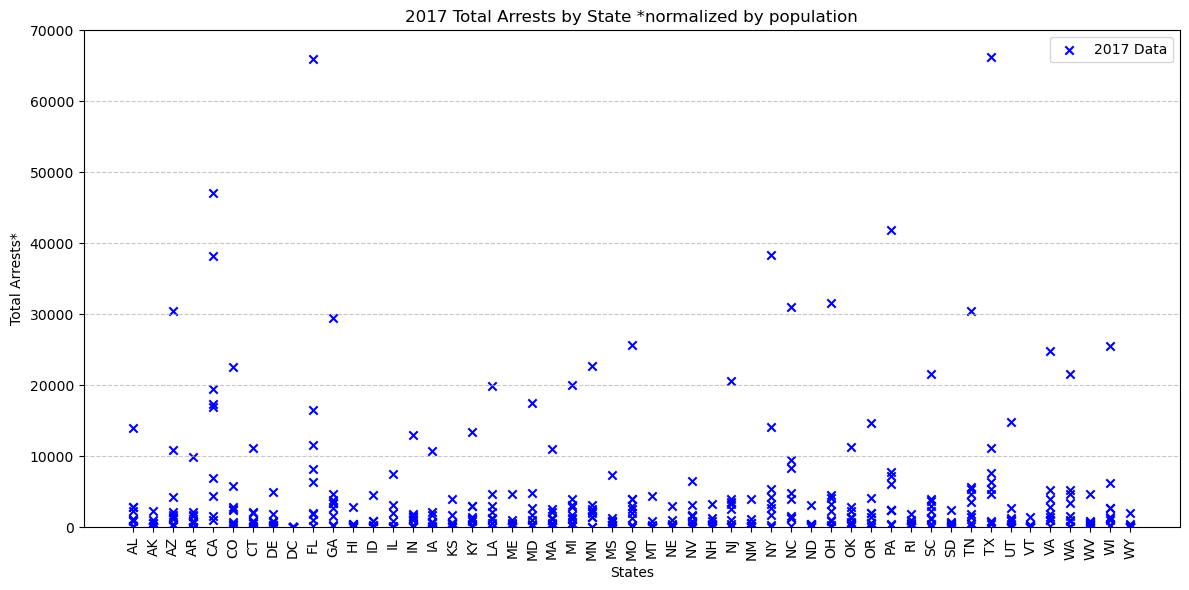

In [89]:
# Filter the DataFrame to include only the data for the year 2017
data_2017 = normalized_data[normalized_data["Year"] == 2017]

# Extract the relevant columns ("State" and "Total Arrests")
states = data_2017["State"]
total_arrests_2017 = data_2017["Arrests"]

# Create a scatter plot
plt.figure(figsize=(12, 6))  
plt.scatter(states, total_arrests_2017, marker='x', color='blue', label="2017 Data")

# Customize the plot
plt.title("2017 Total Arrests by State *normalized by population")
plt.xlabel("States")
plt.ylabel("Total Arrests*")
plt.xticks(rotation=90)  
plt.ylim(0, 70000)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Show the scatter plot
plt.tight_layout()  
plt.show()

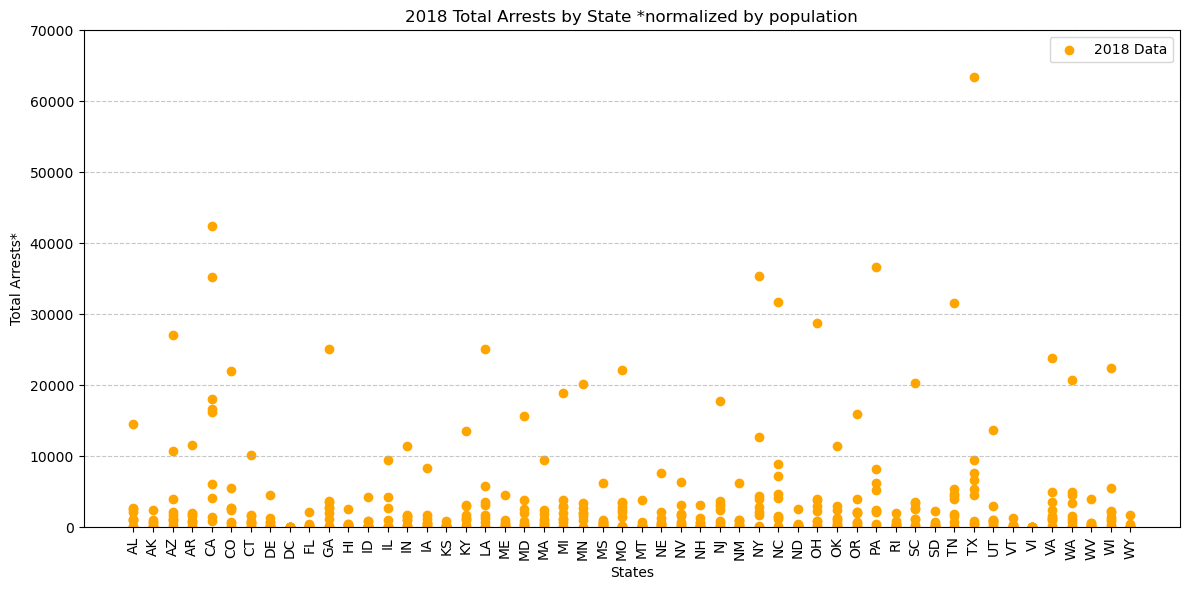

In [90]:
# Filter the DataFrame to include only the data for the year 2018
data_2018 = normalized_data[normalized_data["Year"] == 2018]

# Extract the relevant columns ("State" and "Total Arrests")
states = data_2018["State"]
total_arrests_2018 = data_2018["Arrests"]

# Create a scatter plot
plt.figure(figsize=(12, 6))  
plt.scatter(states, total_arrests_2018, marker='o', color='orange', label="2018 Data")

# Customize the plot
plt.title("2018 Total Arrests by State *normalized by population")
plt.xlabel("States")
plt.ylabel("Total Arrests*")
plt.xticks(rotation=90)  
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.ylim(0, 70000)

# Show the scatter plot
plt.tight_layout()  
plt.show()

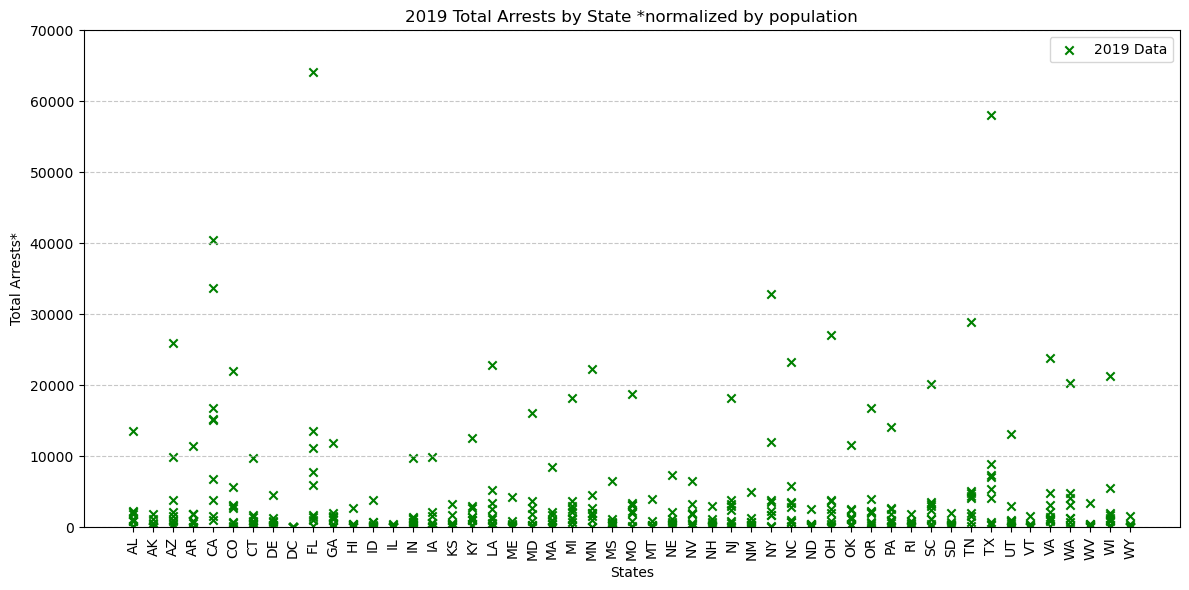

In [91]:
# Filter the DataFrame to include only the data for the year 2019
data_2019 = normalized_data[normalized_data["Year"] == 2019]

# Extract the relevant columns ("State" and "Total Arrests")
states = data_2019["State"]
total_arrests_2019 = data_2019["Arrests"]

# Create a scatter plot
plt.figure(figsize=(12, 6))  
plt.scatter(states, total_arrests_2019, marker='x', color='green', label="2019 Data")

# Customize the plot
plt.title("2019 Total Arrests by State *normalized by population")
plt.xlabel("States")
plt.ylabel("Total Arrests*")
plt.xticks(rotation=90)  
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.ylim(0, 70000)

# Show the scatter plot
plt.tight_layout()  
plt.show()

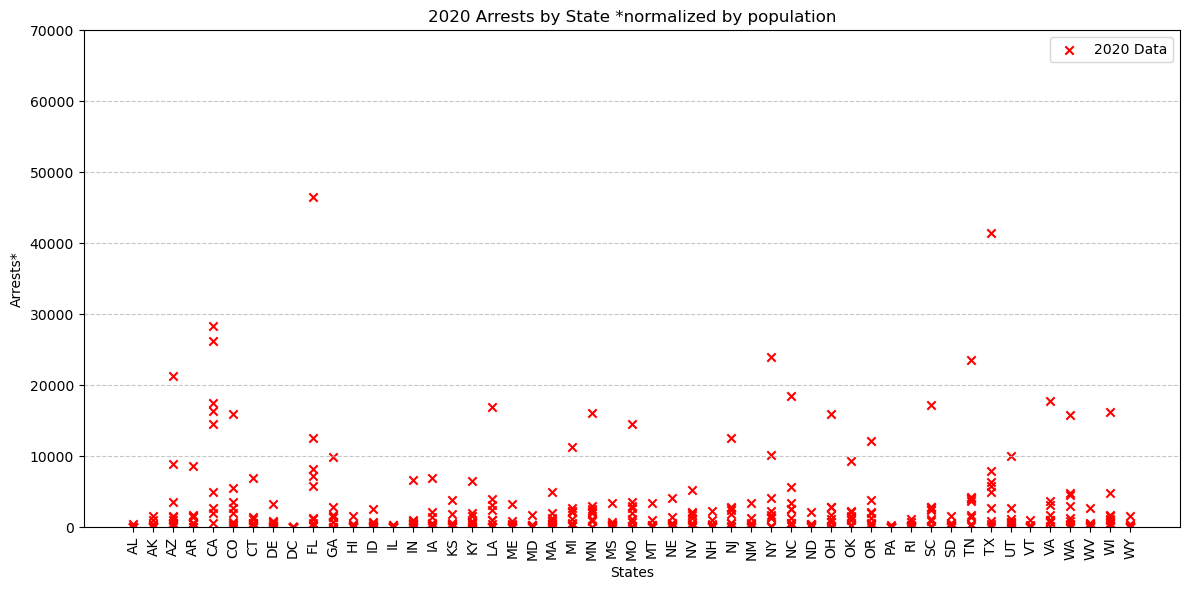

In [92]:
# Filter the DataFrame to include only the data for the year 2020
data_2020 = normalized_data[normalized_data["Year"] == 2020]

# Extract the relevant columns ("State" and "Total Arrests")
states = data_2020["State"]
total_arrests_2020 = data_2020["Arrests"]

# Create a scatter plot
plt.figure(figsize=(12, 6))  
plt.scatter(states, total_arrests_2020, marker='x', color='red', label="2020 Data")

# Customize the plot
plt.title("2020 Arrests by State *normalized by population")
plt.xlabel("States")
plt.ylabel("Arrests*")
plt.xticks(rotation=90)  
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.ylim(0, 70000)

# Show the scatter plot
plt.tight_layout()  
plt.show()

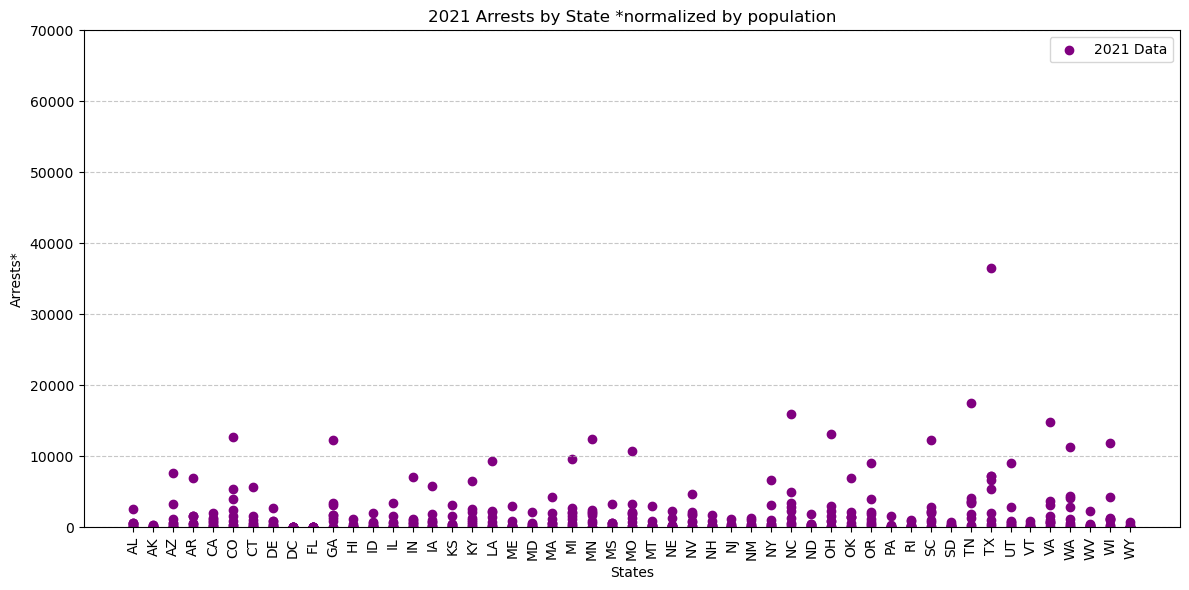

In [93]:
# Filter the DataFrame to include only the data for the year 2021
data_2021 = normalized_data[normalized_data["Year"] == 2021]

# Extract the relevant columns ("State" and "Total Arrests")
states = data_2021["State"]
total_arrests_2021 = data_2021["Arrests"]

# Create a scatter plot
plt.figure(figsize=(12, 6))  
plt.scatter(states, total_arrests_2021, marker='o', color='purple', label="2021 Data")

# Customize the plot
plt.title("2021 Arrests by State *normalized by population")
plt.xlabel("States")
plt.ylabel("Arrests*")
plt.xticks(rotation=90)  
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.ylim(0, 70000)

# Show the scatter plot
plt.tight_layout()  
plt.show()

In [40]:
#Create total arrests df by year and states
state_total = combined_cleaned.groupby(["Year","State"])["Total Arrests"].sum().reset_index()
state_total

,Year,State,Total Arrests
0,2017,AK,5213
1,2017,AL,25436
2,2017,AR,17981
3,2017,AZ,52895
4,2017,CA,153175
...,...,...,...
251,2021,VT,1974
252,2021,WA,25072
253,2021,WI,21860
254,2021,WV,4062


In [79]:
#Filter by CA
ca_data = state_total[state_total['State'] == 'CA']
ca_data

,Year,State,Total Arrests
4,2017,CA,153175
55,2018,CA,141270
107,2019,CA,134707
158,2020,CA,113589
209,2021,CA,7060


In [80]:
#Filter by NY
ny_data = state_total[state_total['State'] == 'NY']
ny_data

,Year,State,Total Arrests
34,2017,NY,70330
85,2018,NY,63707
137,2019,NY,58327
188,2020,NY,45600
239,2021,NY,12490


In [81]:
#Filter by FL
fl_data = state_total[state_total['State'] == 'FL']
fl_data

,Year,State,Total Arrests
9,2017,FL,113871
60,2018,FL,3572
112,2019,FL,107224
163,2020,FL,83800
214,2021,FL,171


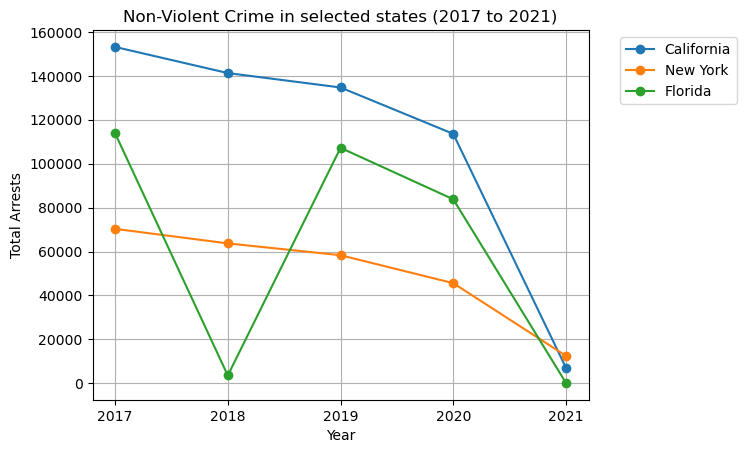

In [44]:
#Create line graph of total arrests by CA, NY, and FL year over year.

plt.plot(ca_data["Year"], ca_data["Total Arrests"], label="California", marker="o")
plt.plot(ny_data["Year"], ny_data["Total Arrests"], label="New York", marker="o")
plt.plot(fl_data["Year"], fl_data["Total Arrests"], label="Florida", marker="o")


plt.title("Non-Violent Crime in selected states (2017 to 2021)")
plt.xlabel("Year")
plt.ylabel("Total Arrests")

plt.xticks(national_total["Year"])
plt.ticklabel_format(style='plain', axis='y')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.show()

In [37]:
pivot_plot.to_csv('normalized_data_2017to2021_df.csv', index=False)

In [24]:
plot_data2 = normalized_data.groupby(['State', 'Year'])['Arrests'].sum().reset_index()
plot_data2

,State,Year,Arrests
0,AK,2017,5213
1,AK,2018,5395
2,AK,2019,4507
3,AK,2020,3812
4,AK,2021,972
...,...,...,...
251,WY,2017,3192
252,WY,2018,2876
253,WY,2019,2586
254,WY,2020,2688


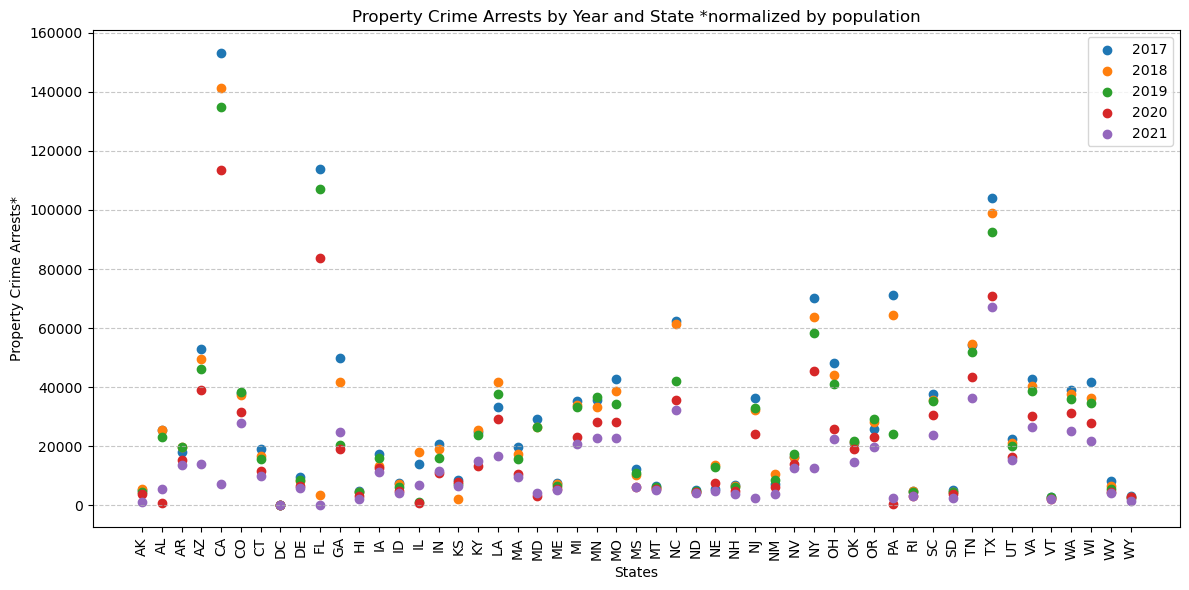

In [44]:
# # Filter the DataFrame to include data for the years 2017 to 2021
years = [2017, 2018, 2019, 2020, 2021]
data_years = normalized_data[normalized_data["Year"].isin(years)]

# # Extract the relevant columns (e.g., "Year," "State," and "Total Arrests")
# # Get unique states across all years
# states = data_years["State"].unique()  

# # Create a DataFrame to store the data for plotting
# plot_data = pd.DataFrame({"State": states})

# for year in years:
#     data_year = data_years[data_years["Year"] == year]
#     total_arrests = data_year.groupby("State")["Arrests"].sum()
#     plot_data2[f"Total Arrests {year}"] = plot_data2["State"].map(total_arrests)

# Filter the DataFrame to include data for the years 2017 to 2021
years = [2017, 2018, 2019, 2020, 2021]
data_years = normalized_data[normalized_data["Year"].isin(years)]

pivot_plot = plot_data2.pivot(index='State', columns='Year', values='Arrests').reset_index()

pivot_plot.columns.name = None
pivot_plot.rename(columns={year: f'Arrests for {year}' for year in pivot_plot.columns[1:]}, inplace=True)

pivot_plot = pivot_plot.dropna()
pivot_plot

# Create a scatter plot for all years and states
plt.figure(figsize=(12, 6))

for year in years:
    plt.scatter(pivot_plot["State"], pivot_plot[f"Arrests for {year}"], marker='o', label=f"{year}")

# Customizations
plt.title("Property Crime Arrests by Year and State *normalized by population")
plt.xlabel("States")
plt.ylabel("Property Crime Arrests*")
plt.xticks(rotation=90)  
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Show it
plt.tight_layout()  
plt.show()